## Collecting the data from the web

In [ ]:
from crawler import scrape_market_insider

scrape_market_insider("data")

Level 60:root:Scraping shortterm
Level 60:root:Into page 1


## Collating the data into one data file

In [2]:
from data_collator import generate_final_data
generate_final_data()

Level 60:root:Processing file: cleaned_data.csv
Level 60:root:Processing file: data.csv
Level 60:root:Processing file: final_data.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Processing file: January 08 2024.csv
Level 60:root:Processing file: January 09 2024.csv
Level 60:root:Processing file: January 10 2024.csv
Level 60:root:Processing file: January 11 2024.csv
Level 60:root:Processing file: January 12 2024.csv
Level 60:root:Processing file: January 13 2024.csv
Level 60:root:Finished processing


In [1]:
import pandas as pd
from utils import *

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087H235,CAD,2.00,3.33%,Aaa,06/01/2028,94.55,94.77,08/01/2017,94.660
1,CA135087N266,CAD,1.50,3.27%,Aaa,12/01/2031,87.68,87.82,10/25/2021,87.750
2,CA135087L443,CAD,0.50,3.28%,Aaa,12/01/2030,83.08,83.17,10/05/2020,83.125
3,CA135087M847,CAD,1.25,3.61%,Aaa,03/01/2027,93.13,93.15,10/15/2021,93.140
4,CA135087M276,CAD,1.50,3.28%,Aaa,06/01/2031,88.36,88.50,4/26/2021,88.430
...,...,...,...,...,...,...,...,...,...,...
253,CA135087Q319,CAD,3.75,4.36%,Aaa,5/1/2025,99.26,99.38,2/10/2023,99.320
254,CA135087P402,CAD,3.00,4.75%,Aaa,11/1/2024,98.70,98.71,8/15/2022,98.705
255,CA135087P816,CAD,3.00,3.79%,Aaa,4/1/2026,98.42,98.54,1/20/2023,98.480
256,CA135087Q806,CAD,4.50,4.04%,Aaa,11/1/2025,100.93,100.94,8/4/2023,100.935


In [4]:
data = data.loc[data.groupby('ISIN')['Ask'].idxmax()]

In [5]:
data.reset_index(inplace=True)

In [6]:
data.drop('index', axis=1, inplace=True)

In [7]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.01%,Aaa,6/1/2024,99.09,99.10,7/2/2013,99.095
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.425
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.195
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.515
4,CA135087H235,CAD,2.00,3.33%,Aaa,6/1/2028,94.91,95.03,8/1/2017,94.970


In [8]:
data.to_csv('data/cleaned_data.csv', index=False)

In [9]:
data = pd.read_csv('data/cleaned_data.csv')

In [10]:
data.head()

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.50,5.01%,Aaa,6/1/2024,99.09,99.10,7/2/2013,99.095
1,CA135087D507,CAD,2.25,4.21%,Aaa,6/1/2025,97.36,97.49,6/30/2014,97.425
2,CA135087E679,CAD,1.50,3.70%,Aaa,6/1/2026,95.13,95.26,7/21/2015,95.195
3,CA135087F825,CAD,1.00,3.42%,Aaa,6/1/2027,92.35,92.68,8/3/2016,92.515
4,CA135087H235,CAD,2.00,3.33%,Aaa,6/1/2028,94.91,95.03,8/1/2017,94.970


In [11]:
data['Maturity Date'] = pd.to_datetime(data['Maturity Date'], format='%m/%d/%Y')
data['Issue Date'] = pd.to_datetime(data['Issue Date'], format='%m/%d/%Y')

In [12]:
data = get_bonds(data)

In [13]:
data

,ISIN,Currency,Coupon,Yield,Moody's Rating,Maturity Date,Bid,Ask,Issue Date,Bond Price
0,CA135087B451,CAD,2.500,5.01%,Aaa,2024-06-01,99.09,99.10,2013-07-02,99.095
1,CA135087D507,CAD,2.250,4.21%,Aaa,2025-06-01,97.36,97.49,2014-06-30,97.425
2,CA135087E679,CAD,1.500,3.70%,Aaa,2026-06-01,95.13,95.26,2015-07-21,95.195
3,CA135087F825,CAD,1.000,3.42%,Aaa,2027-06-01,92.35,92.68,2016-08-03,92.515
4,CA135087H235,CAD,2.000,3.33%,Aaa,2028-06-01,94.91,95.03,2017-08-01,94.970
5,CA135087J397,CAD,2.250,3.25%,Aaa,2029-06-01,95.39,95.53,2018-07-27,95.460
6,CA135087J546,CAD,2.250,4.88%,Aaa,2024-03-01,99.64,99.70,2018-10-05,99.670
7,CA135087J967,CAD,1.500,4.77%,Aaa,2024-09-01,97.98,98.06,2019-04-05,98.020
8,CA135087K528,CAD,1.250,4.41%,Aaa,2025-03-01,96.66,96.67,2019-10-11,96.665
9,CA135087K940,CAD,0.500,4.08%,Aaa,2025-09-01,94.46,94.59,2020-04-03,94.525


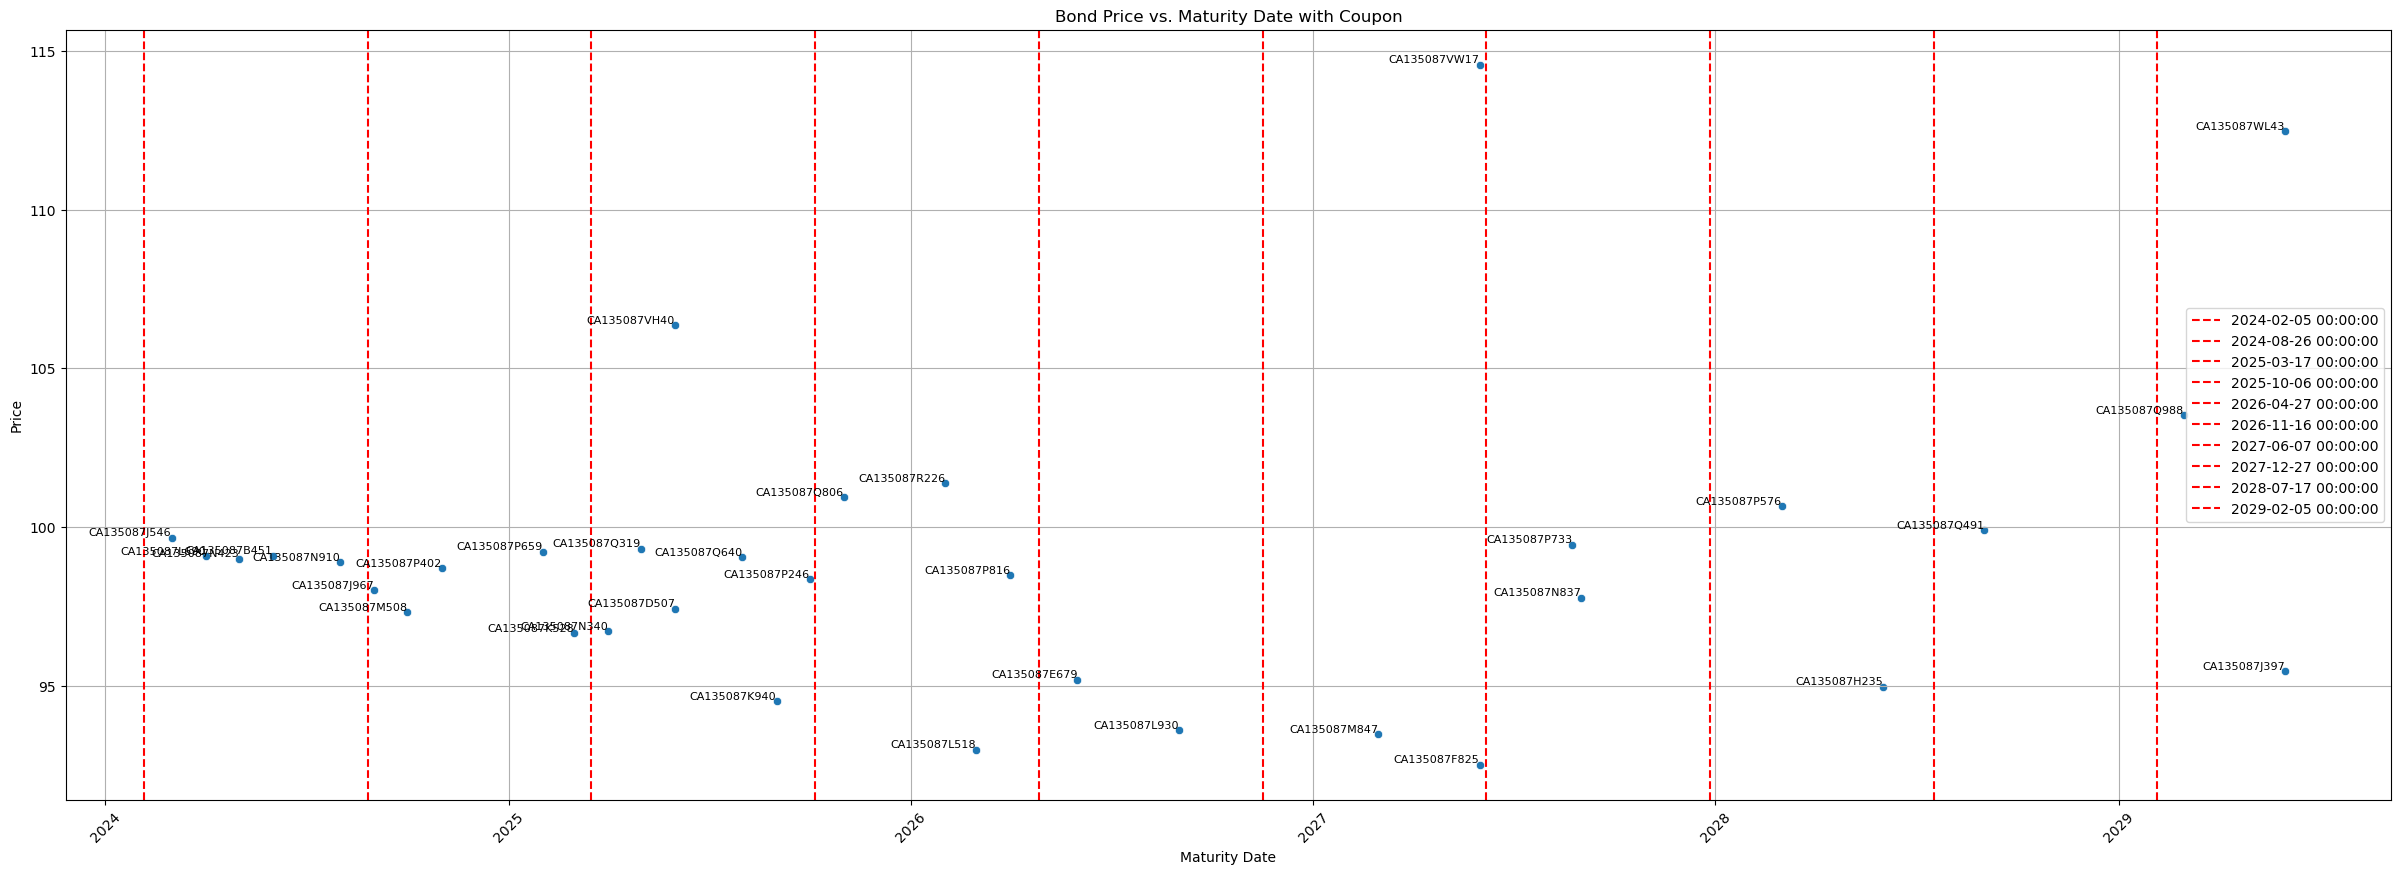

In [14]:
plot_bonds_price(data)